In [2]:
#lets import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
#loading dataset to pandas dataframe
loan_data = pd.read_csv(r"C:\Users\bhara\Downloads\loan_dataset.csv")

In [4]:
#printing the first 5 rows of dataset
loan_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [5]:
#printing the last 5 rows of dataset
loan_data.tail()

Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

In [6]:
#checking total rows and columns
loan_data.shape

(614, 13)

#### Data Pre-Processing

In [7]:
#getting the information of dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We are able to find null values in gender,married, dependents,selfemployeed,loanamount,loanamountterm,credithistory columns

In [8]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#getting statistical reference
loan_data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [11]:
#dropping the missing values
loan_data = loan_data.dropna()

In [12]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##### Label Encoding

In [14]:
loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [15]:
loan_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area  Loan_Status  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0         Urban            1  
4             1.0         Urban            1  
5             1.0         Urban            1

In [16]:
#dependents column values
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

Here we have 3+ values is not good, so lets replace the value with 5

In [20]:
loan_data = loan_data.replace(to_replace='3+',value=4)

In [21]:
#dependents column values
loan_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [17]:
#dependents column values
loan_data['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [18]:
#dependents column values
loan_data['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

#### Data Visualization

<Axes: xlabel='Education', ylabel='count'>

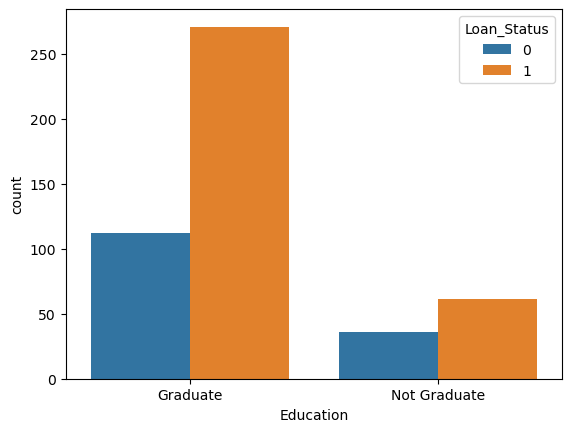

In [22]:
#Education and loan status
sns.countplot(x ='Education',hue='Loan_Status',data=loan_data)

In most of cases if person is graduate loan approved are more compare to non-graduate

<Axes: xlabel='Married', ylabel='count'>

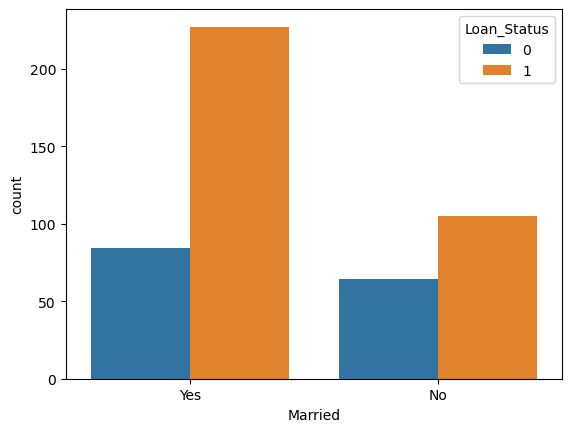

In [23]:
#martial status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=loan_data)

If a person is married, high chances of getting loan approved compare to not married person

<Axes: xlabel='Gender', ylabel='count'>

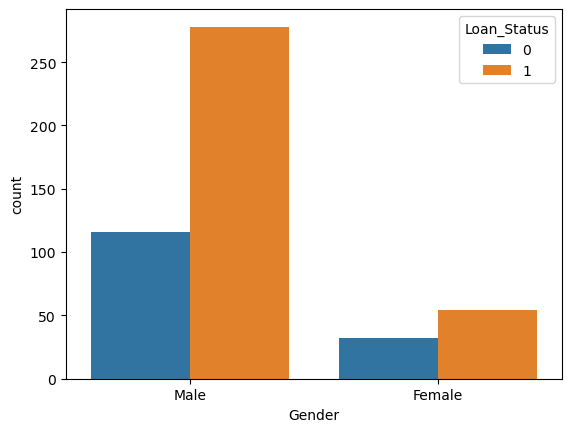

In [24]:
#martial status and loan status
sns.countplot(x='Gender',hue='Loan_Status',data=loan_data)

Compare to female, males has more chances of gettting loan approved

<Axes: xlabel='Self_Employed', ylabel='count'>

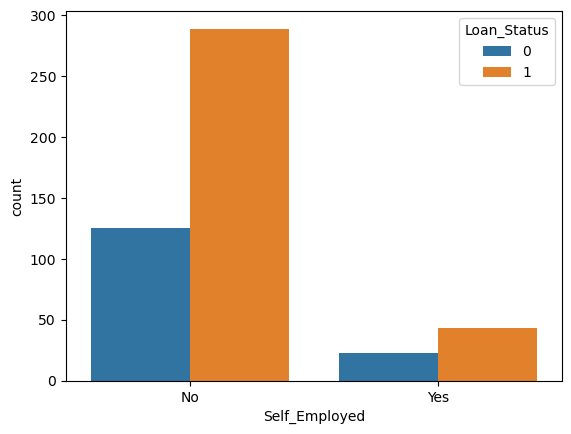

In [25]:
#Self_Employed and loan status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_data)

If the person is not self-employed he has a high chances to get loan approved this means person should be working any private 
or public companies

<Axes: xlabel='Property_Area', ylabel='count'>

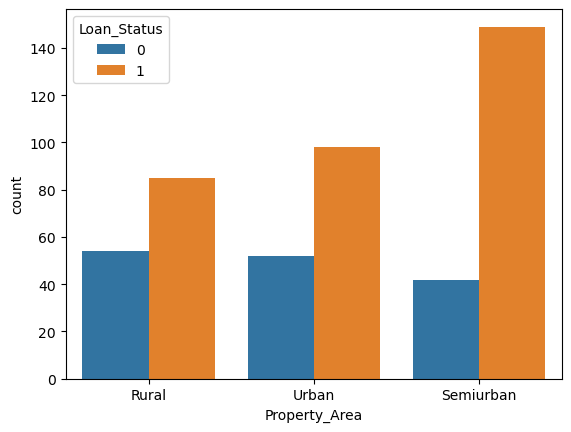

In [26]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=loan_data)

#### Convert categorical columns to numerical values

In [30]:
loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
     

In [31]:
loan_data.head()

Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1  LP001003       1        1          1          1              0   
2  LP001005       1        1          0          1              1   
3  LP001006       1        1          0          0              0   
4  LP001008       1        0          0          1              0   
5  LP001011       1        1          2          1              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History  Property_Area  Loan_Status  
1             1.0              0            0  
2             1.0              2            1  
3             1.0              2            1  
4             1.0              2            1  
5             1.0              2            1

Here, we can see all categorical columns to numerical values

#### Separating features and label

In [32]:
X = loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_data['Loan_Status']

In [33]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

#### Train Test Split

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [35]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


#### Training the model

In [37]:
#SVM
classifier = svm.SVC(kernel='linear')

In [38]:
#training the svm
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

#### Model Evaluation

In [39]:
#accuracy on the training data
X_train_prediction = classifier.predict(X_train)
accuracy_score_training = accuracy_score(X_train_prediction,Y_train)

In [40]:
print("The accuracy on training data is : ",accuracy_score_training)

The accuracy on training data is :  0.7786458333333334


In [41]:
#accuracy on the training data
X_test_prediction = classifier.predict(X_test)
accuracy_score_test = accuracy_score(X_test_prediction,Y_test)

In [42]:
print("The accuracy on test data is : ",accuracy_score_test)

The accuracy on test data is :  0.8125
